In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
DATASET_PATH = "/content/drive/My Drive/ire-proj/processedData"
!ls "$DATASET_PATH"

articles-training-byarticle.csv        articles-validation-bypublisher.csv
articles-training-bypublisher.csv      glove.6B.300d.txt
articles-training-bypublisher-old.csv


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv(filepath_or_buffer=DATASET_PATH + '/articles-training-bypublisher.csv',
                 names=['article_id', 'title', 'articleContent', 'bias', 'hyperpartisan'])

In [5]:
df.head()

,article_id,title,articleContent,bias,hyperpartisan
0,1,After DeVos Announced Plans To Reexamine Title...,When explaining her decision to reevaluate Tit...,right,True
1,2,University To Award Trayvon Martin With Posthu...,A Florida university will honor Trayvon Martin...,right,True
2,8,Texas State University suspends Greek life aft...,Nov. 15 (UPI) — Texas State University has sus...,right-center,False
3,12,Jewish Organization's Huge Day Of Unity On Tue...,Against the backdrop of an increasingly polari...,right,True
4,15,"BREAKING: Trump Reaches Agreement To Keep 1,00...",President-elect Donald Trump has reached an ag...,right,True


In [6]:
len(df[df.hyperpartisan==True]), len(df[df.hyperpartisan==False])

(300000, 300000)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [0]:
X = df.articleContent.values
y = df.hyperpartisan.values

tfidfVectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,2), max_df=0.85, min_df=0.05)
tfidfVectorizer.fit(X)

X_tfidf = tfidfVectorizer.transform(X)

X_tfidf_train, X_tfidf_validate, y_train, y_validate = train_test_split(X_tfidf, y, test_size = 0.2, random_state=1234)

# Logistic Regression


In [9]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression()

lrmodel.fit(X_tfidf_train, y_train)

y_pred = lrmodel.predict(X_tfidf_validate)

from sklearn.metrics import f1_score, accuracy_score

print("f1 score: ", f1_score(y_validate, y_pred, average=None) *100)
print('accuracy: ', accuracy_score(y_validate, y_pred) *100)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1 score:  [86.71795519 86.95163755]
accuracy:  86.83583333333334


Text(33.0, 0.5, 'True')

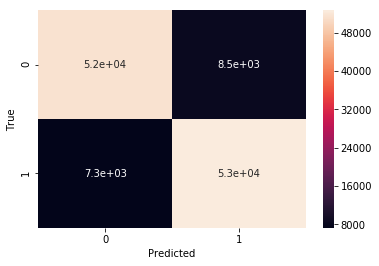

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm = confusion_matrix(y_true=y_validate, y_pred=y_pred, labels=[False, True])
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True') 

# Load validation data as test set

In [11]:
df_test = pd.read_csv(filepath_or_buffer=DATASET_PATH + '/articles-validation-bypublisher.csv',
                 names=['article_id', 'title', 'articleContent', 'bias', 'hyperpartisan'])
df_test.shape

(150000, 5)

In [15]:
len(df_test[df_test.hyperpartisan==True]), len(df_test[df_test.hyperpartisan==False])

(75000, 75000)

In [0]:
X_test = df_test.articleContent.values
y_test = df_test.hyperpartisan.values

X_test_tfidf = tfidfVectorizer.transform(X_test)
y_test_pred = lrmodel.predict(X_test_tfidf)

In [14]:
print("test f1 score: ", f1_score(y_test, y_test_pred, average=None) *100)
print('test accuracy: ', accuracy_score(y_test, y_test_pred) *100)

test f1 score:  [43.67963467 65.5445119 ]
test accuracy:  57.245333333333335


In [0]:
# TODO: perform grid search cv